pip install opencv-python

In [3]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# mean squared error
def MSE(original, compressed):
    return np.mean((original - compressed) ** 2)


# peak signal-to-noise radio
def PSNR(original, compressed):
    mse = MSE(original, compressed)
    if (mse == 0):
        return 100
    max_pixel = 255.0
    return 20 * math.log10(max_pixel / math.sqrt(mse))


In [5]:
def show(path, K1, K2):
    # load the image into the rgb space
    in_img = cv2.imread(path)
    # convert to HSV
    in_img = cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB)
    # converts M*N*3 image into a K*3 matrix where K = M*N
    # and each row is now a vector in the 3-D space of RGB.
    Z = in_img.reshape((-1, 3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    def compute_for(K):
        _, label, center = cv2.kmeans(
            Z,
            K,
            None,
            criteria,
            10,
            cv2.KMEANS_PP_CENTERS)
        # Now convert back into uint8, and make original image
        center = np.uint8(center)
        res = center[label.flatten()]
        out_img = res.reshape((in_img.shape))
        return out_img

    out_img1 = compute_for(K1)
    out_img2 = compute_for(K2)
    figure_size = 15
    plt.figure(figsize=(figure_size, figure_size))
    plt.subplot(1, 3, 1), plt.imshow(in_img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 3, 2), plt.imshow(out_img1)
    plt.title(f"Segmented Image when K = {K1}"), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 3, 3), plt.imshow(out_img2)
    plt.title(f"Segmented Image when K = {K2}"), plt.xticks([]), plt.yticks([])
    plt.show()

    print(f"MSE for K1 = {'{:.2f}'.format(MSE(in_img, out_img1))}")
    print(f"PSNR for K1 = {'{:.2f}'.format(PSNR(in_img, out_img1))} db")

    print(f"MSE for K2 = {'{:.2f}'.format(MSE(in_img, out_img2))}")
    print(f"PSNR for K2 = {'{:.2f}'.format(PSNR(in_img, out_img2))} db")


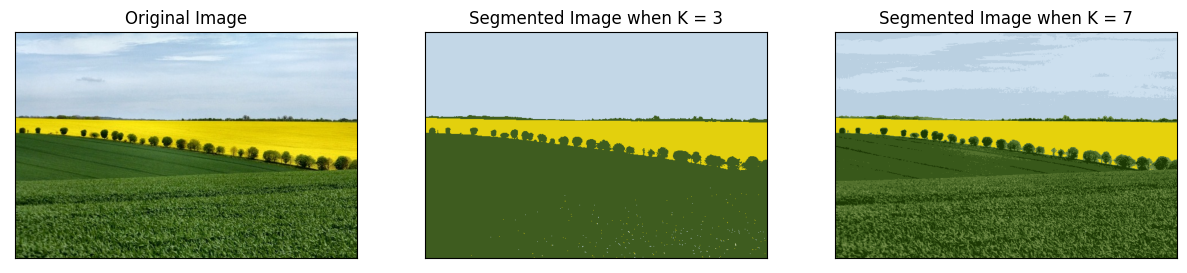

MSE for K1 = 78.24
PSNR for K1 = 29.20 db
MSE for K2 = 50.23
PSNR for K2 = 31.12 db


In [6]:
show('img/in1.jpg', 3, 7)


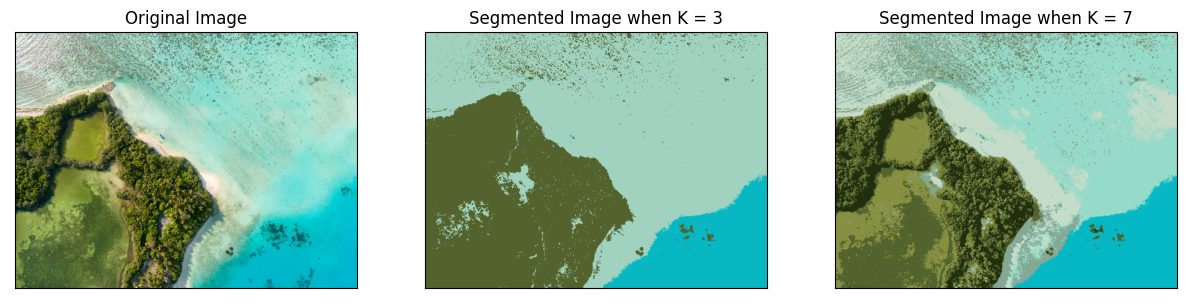

MSE for K1 = 93.31
PSNR for K1 = 28.43 db
MSE for K2 = 78.00
PSNR for K2 = 29.21 db


In [7]:
show('img/in4.jpg', 3, 7)

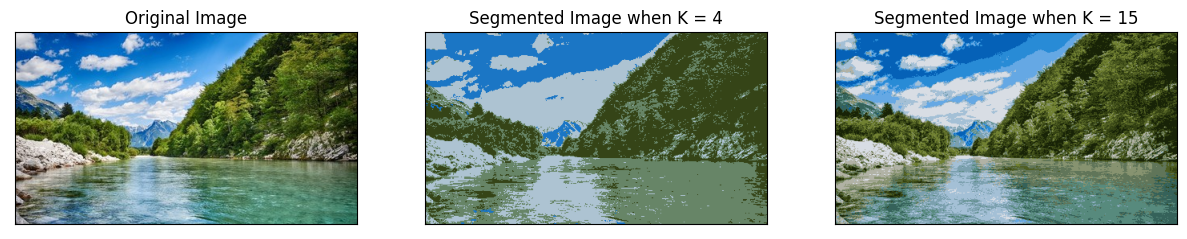

MSE for K1 = 95.54
PSNR for K1 = 28.33 db
MSE for K2 = 73.97
PSNR for K2 = 29.44 db


In [8]:
show('img/in2.jpg', 4, 15)


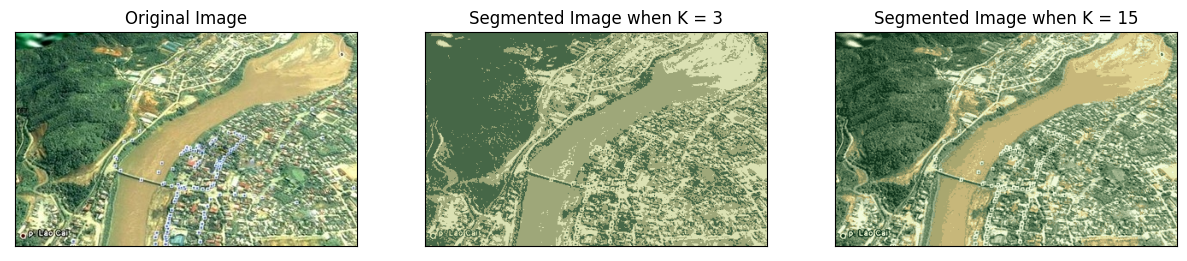

MSE for K1 = 93.34
PSNR for K1 = 28.43 db
MSE for K2 = 56.91
PSNR for K2 = 30.58 db


In [9]:
show('img/in3.jpg', 3, 15)
